In [1]:
import sys
sys.path.append("src/")
from LinkedList import LinkedList
from Event import Event
from ArrayList import ArrayList
from GenerateData import create_event_dataset
import matplotlib.pyplot as plt
import random


Testing 50 events...
insertion sort: 0.00017 seconds
merge sort: 0.00016 seconds
quick sort: 0.00030 seconds

Testing 500 events...
insertion sort: 0.00642 seconds
merge sort: 0.00100 seconds
quick sort: 0.00135 seconds

Testing 5000 events...
insertion sort: 0.76801 seconds
merge sort: 0.01248 seconds
quick sort: 0.01838 seconds

Testing 50000 events...
insertion sort: 78.15745 seconds
merge sort: 0.16236 seconds
quick sort: 0.22674 seconds


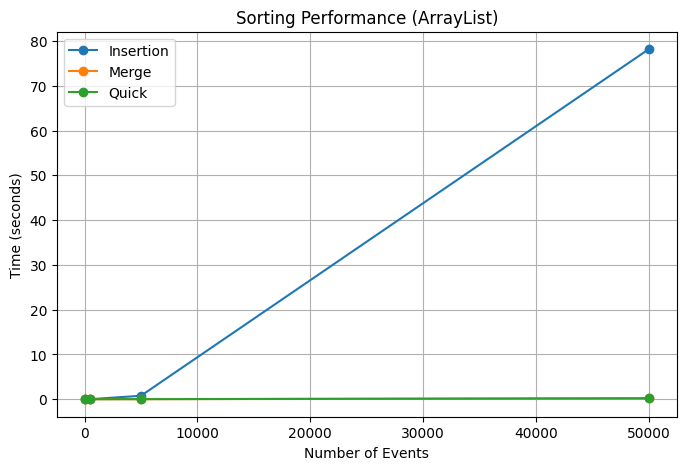

In [3]:
import random
import string
import time
import matplotlib.pyplot as plt

def random_event(i):
    title = ''.join(random.choices(string.ascii_uppercase, k=5))
    date = f"2025-{random.randint(1,12):02d}-{random.randint(1,28):02d}"
    start_hour = random.randint(0, 22)
    start_min = random.choice([0, 15, 30, 45])
    end_hour = start_hour + 1
    end_min = start_min
    location = random.choice(["Denver", "Boulder", "Aspen", "Vail"])
    return Event(i, title, date, f"{start_hour:02d}:{start_min:02d}", f"{end_hour:02d}:{end_min:02d}", location)


sizes = [50, 500, 5000, 50000]
methods = ["insertion", "merge", "quick"]
results = {m: [] for m in methods}

for n in sizes:
    events = [random_event(i) for i in range(n)]
    random.shuffle(events)
    print(f"\nTesting {n} events...")
    for method in methods:
        arr = ArrayList()
        for ev in events:
            arr.insert(ev)

        start = time.time()
        arr.sort_list(by="id", method=method)
        end = time.time()

        runtime = end - start
        results[method].append(runtime)
        print(f"{method} sort: {runtime:.5f} seconds")

# Plot results
plt.figure(figsize=(8,5))
for method in methods:
    plt.plot(sizes, results[method], marker='o', label=method.capitalize())

plt.xlabel("Number of Events")
plt.ylabel("Time (seconds)")
plt.title("Sorting Performance (ArrayList)")
plt.legend()
plt.grid(True)
plt.show()